In [33]:
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [19]:
def load_blurred_image(img_path):
    img = load_img(img_path, target_size=(256, 256))
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0) 

In [41]:
model = keras.models.load_model("unet_denoising_model_200.keras")

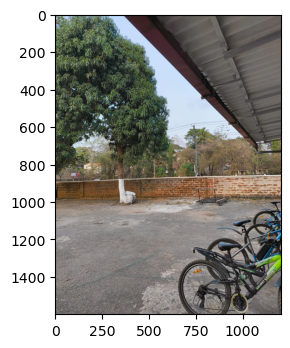

In [137]:
image = cv2.imread('real_ex.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_img = cv2.GaussianBlur(image, (11, 11), 0)
plt.subplot(1, 2, 2)
plt.imshow(image) 

In [133]:
input_img= cv2.resize(input_img, (256, 256))
input_img = input_img/ 255.0
input_img = np.expand_dims(input_img, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


(-0.5, 255.5, 255.5, -0.5)

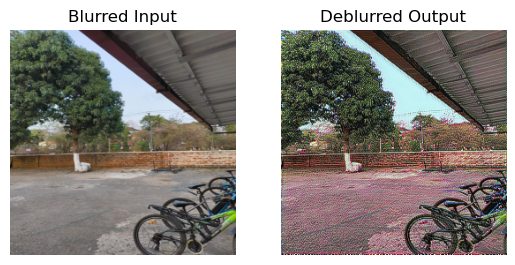

In [135]:
predicted = model.predict(predicted)
img = np.squeeze(predicted, axis=0) 
predicted_img = (img * 255.0).astype(np.uint8)
original_img = np.squeeze(input_img, axis=0)
plt.subplot(1, 2, 1)
plt.title("Blurred Input")
plt.imshow(original_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Deblurred Output")
plt.imshow(predicted_img) 
plt.axis('off')